## Assignment 1 

For this assignment the diabetes dataset of sklearn library is going to be used.  
The predictors of the dataset are already normalized in (-.2, .2) and can be directly used for modelling.  
Current assignment is focused on using linear regression algorithms.

### Brief description

The predictors we can use to model our problem are the following:
* age age in years 
* sex 
* bmi body mass index 
* bp average blood pressure 
* s1 tc, T-Cells (a type of white blood cells) 
* s2 ldl, low-density lipoproteins 
* s3 hdl, high-density lipoproteins 
* s4 tch, thyroid stimulating hormone 
* s5 ltg, lamotrigine 
* s6 glu, blood sugar level 

The variables were calculated at baseline level.  
The goal is to predict the quanitive variable target, that represents a measure of disease progression one year after the baseline.

_note_: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

As found on [sklearn documentation](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [15]:
#
diabetes = datasets.load_diabetes(as_frame=True)
diabetesDF = diabetes['frame']

The following graphical representation of the data is a heatmap.  
In each of the bins, the correlation between variables is represented.

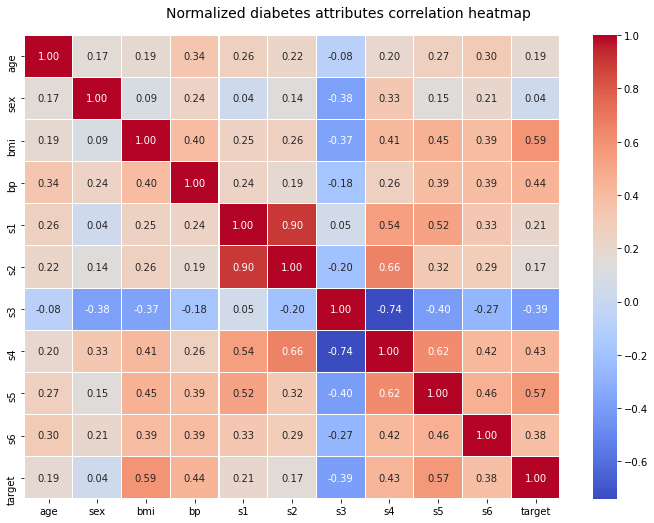

In [18]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
# use corr method of pandas dataframe to calculate pairwise calculation between features
# and features and target variable
corr = diabetesDF.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Normalized diabetes attributes correlation heatmap', fontsize=14)

The variables that have the largest correlation coefficient are bmi(0.59), bp(0.44), s3(-0.33) and s5(0.57).  
Pairwise plots of these variables are ploted as well, to show the correlation between these values and the target variable.

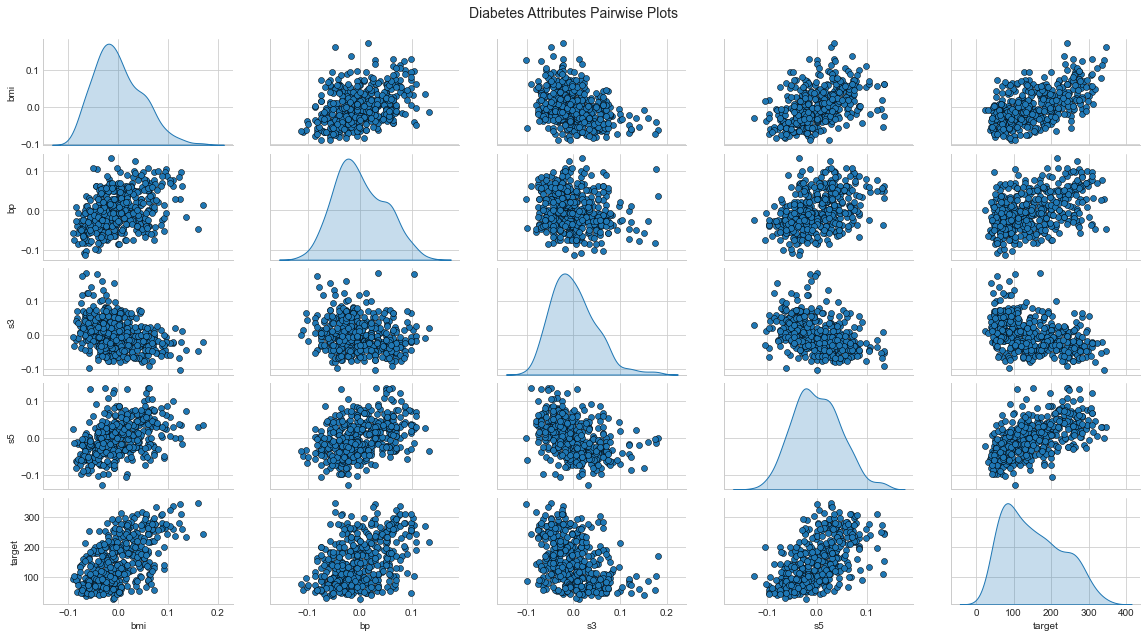

In [82]:
# Pair-wise Scatter Plots
cols = ['bmi', 'bp', 's3', 's5', 'target']
pp = sns.pairplot(diabetesDF[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.2)
t = fig.suptitle('Diabetes Attributes Pairwise Plots', fontsize=14)

## Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

### Multiple linear regression

In [25]:
# split the data in train and test set 
X, y = diabetesDF[[x for x in diabetesDF.columns if x!='target']].to_numpy(), diabetesDF['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
# create a regression model and train it using the train dataset
regressor = LinearRegression()
regressor.fit(X_train, y_train.T)

LinearRegression()

In [27]:
# use the model to predict unseen data
predictions = regressor.predict(X_test)

In [31]:
# calculate the metrics 
print(f'Mean squared error MSE: {round(mean_squared_error(y_test, predictions),2)}')
print(f'Coefficient of determination r^2: {round(r2_score(y_test, predictions),2)}')

Mean squared error MSE: 3180.2
Coefficient of determination r^2: 0.36


### Simple linear regression

In [49]:
stats = {}
for i in range(X_train.shape[1]):
    X_train_reg = X_train[:,i].reshape(-1,1)
    X_test_reg = X_test[:,i].reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(X_train_reg, y_train.T)
    predictions = regressor.predict(X_test_reg)

    print(f'Using as independent variable i = {diabetesDF.columns[i]} the following statistics are obtained:')
    print(f'Mean squared error MSE: {round(mean_squared_error(y_test, predictions),2)}')
    print(f'Coefficient of determination r^2: {round(r2_score(y_test, predictions),2)} \n')

    stats.update({i:round(mean_squared_error(y_test, predictions),2)})

key_min = min(stats.keys(), key=(lambda k: stats[k]))
print(f'The lowest error was obtained when using as predictor variable {key_min}')
print(f'This corresponds to variable {diabetesDF.columns[8]}')

Using as independent variable i = age the following statistics are obtained:
Mean squared error MSE: 4787.57
Coefficient of determination r^2: 0.04 

Using as independent variable i = sex the following statistics are obtained:
Mean squared error MSE: 4965.84
Coefficient of determination r^2: -0.0 

Using as independent variable i = bmi the following statistics are obtained:
Mean squared error MSE: 4181.42
Coefficient of determination r^2: 0.16 

Using as independent variable i = bp the following statistics are obtained:
Mean squared error MSE: 4279.94
Coefficient of determination r^2: 0.14 

Using as independent variable i = s1 the following statistics are obtained:
Mean squared error MSE: 4774.77
Coefficient of determination r^2: 0.04 

Using as independent variable i = s2 the following statistics are obtained:
Mean squared error MSE: 4774.6
Coefficient of determination r^2: 0.04 

Using as independent variable i = s3 the following statistics are obtained:
Mean squared error MSE: 4646

In [53]:
# train the model again using the best predictor
X_train_reg = X_train[:,key_min].reshape(-1,1)
X_test_reg = X_test[:,key_min].reshape(-1,1)
simple_regressor = LinearRegression()
simple_regressor.fit(X_train_reg, y_train)
predictions = simple_regressor.predict(X_test_reg)

print(f'Coefficient: {simple_regressor.coef_}')
print(f'Correlation of predictor and target {round(np.corrcoef(diabetesDF.s5, diabetesDF.target)[0,1],2)}')
print(f'Mean squared error MSE: {round(mean_squared_error(y_test, predictions),2)}')
print(f'Coefficient of determination r^2: {round(r2_score(y_test, predictions),2)} \n')

Coefficient: [946.70108655]
Correlation of predictor and target 0.57
Mean squared error MSE: 3829.06
Coefficient of determination r^2: 0.23 



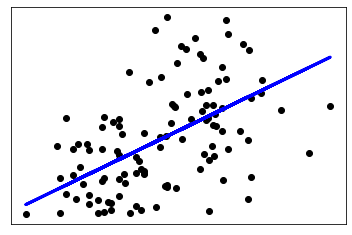

In [54]:
plt.scatter(X_test_reg, y_test,  color='black')
plt.plot(X_test_reg, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()